<a href="https://colab.research.google.com/github/parth721/visual_cryptography/blob/main/chaos_based_cryptography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

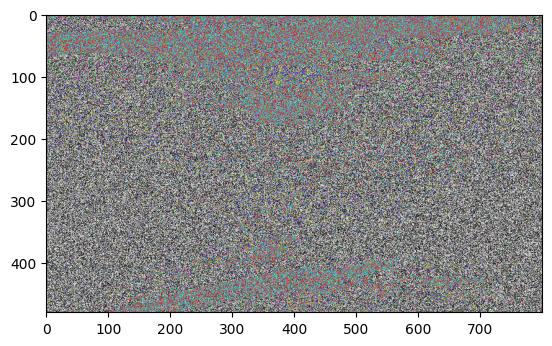

In [ ]:
#import keygen as kg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


### function to generate key using a chaotic map for an eccryption process

def keygen(x, r, size):
    key =[]
    for i in range(size):
       x = r*x*(1-x)
       key.append(int(x*pow(10, 16)%256))

    return key
 
#print(keygen(0.01, 3.915, 10))


# reading the image
img = mpimg.imread('test1_cryptography.jpg')

plt.imshow(img)
plt.show()

# generate chaotic key
height = img.shape[0]
width = img.shape[1]
key = keygen(0.01, 3.95, height * width)   # error
#print(key)

# Encryption-diffusion with XOR
z = 0
enimg = np.zeros(shape=[height, width, 3], dtype=np.uint8)  # error
for i in range(height):
    for j in range(width):
        # pixel value is XORed with key
        enimg[i, j] = img[i, j] ^ key[z] #error
        z = z + 1

plt.imshow(enimg)
plt.show()
plt.imsave("encrypted.jpg", enimg)

# Decryption
z = 0
decimg = np.zeros(shape=[height, width, 3], dtype=np.uint8)
for i in range(height):
    for j in range(width):
        # pixel value is XORed with key
        decimg[i, j] = enimg[i, j] ^ key[z]
        z += 1

plt.imshow(decimg)
plt.imsave("decrypted.jpg", decimg)


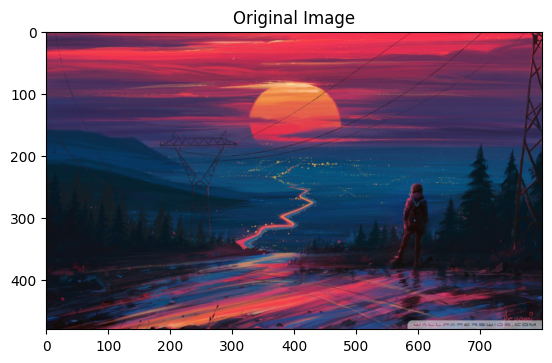

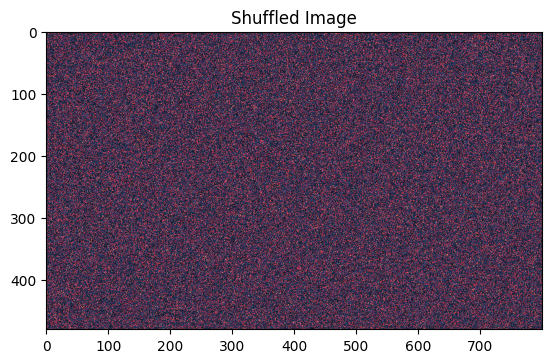

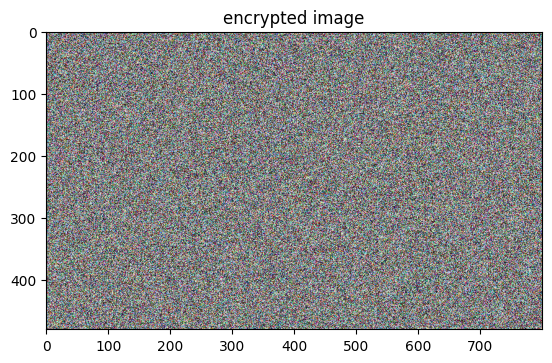

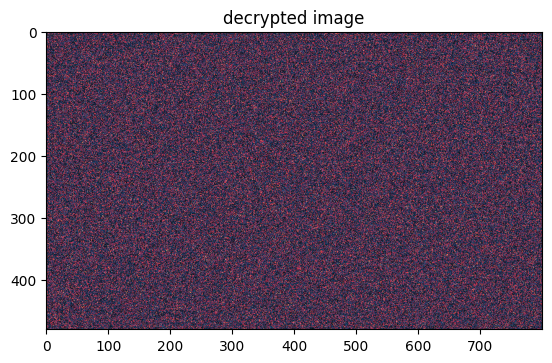

In [ ]:
# confusion of image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### function to generate key using a chaotic map for an encryption process
def keygen(x, r, size):
    key =[]
    for i in range(size):
       x = r*x*(1-x)
       key.append(int(x*pow(10, 16)%256))

    return key


# Load the RGB image
image = plt.imread('test1_cryptography.jpg')

# Display the original image
plt.imshow(image)
plt.title('Original Image')
plt.show()

# generate chaotic key
height = image.shape[0]
width = image.shape[1]
key = keygen(0.01, 3.95, height * width)

# Flatten the RGB image into a 1D array
flattened_image = image.reshape(-1, 3)

# Generate shuffled indices using np.random.permutation()
shuffling_indices = np.random.permutation(flattened_image.shape[0])

# Shuffle the flattened image array using the shuffling indices
shuffled_image = flattened_image[shuffling_indices]

# Reshape the shuffled image back into the original shape
reshuffled_image = shuffled_image.reshape(image.shape)

# Display the shuffled image
plt.imshow(reshuffled_image)
plt.title('Shuffled Image')
plt.show()


# Encryption-diffusion with XOR
z = 0
enimg = np.zeros(shape=[height, width, 3], dtype=np.uint8)  # error
for i in range(height):
    for j in range(width):
        # pixel value is XORed with key
        enimg[i, j] = reshuffled_image[i, j] ^ key[z] #error
        z = z + 1

plt.imshow(enimg)
plt.title("encrypted image")
plt.imsave("diffusion.jpg", enimg)
plt.show()


# Decryption
z = 0
decimg = np.zeros(shape=[height, width, 3], dtype=np.uint8)
for i in range(height):
    for j in range(width):
        # pixel value is XORed with key
        decimg[i, j] = enimg[i, j] ^ key[z]
        z += 1

plt.imshow(decimg)
plt.title("decrypted image")
plt.imsave("confusion.jpg", decimg)
plt.show()

# Sort the shuffling indices in ascending order
sorted_indices = np.argsort(shuffling_indices)

# Reshuffle the flattened image array using the sorted indices
restored_image = shuffled_image[sorted_indices]

# Reshape the restored image back into the original shape
decrypted_image = restored_image.reshape(image.shape)

# Display the decrypted image
plt.imshow(decrypted_image)
plt.title('reshuffled Image')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the RGB image
image = plt.imread('test1_cryptography.jpg')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Display the image in the first subplot
ax1.imshow(image)
ax1.set_title('Original Image')

# Flatten the RGB image into a 1D array
flattened_image = image.reshape(-1, 3)

# Generate the histogram of pixel intensities in the second subplot
ax2.hist(flattened_image, bins=256, color=['red', 'green', 'blue'], label=['Red', 'Green', 'Blue'])
ax2.set_title('Image Histogram')
ax2.set_xlabel('Pixel Intensity')
ax2.set_ylabel('Frequency')

# Display the figure
plt.tight_layout()
plt.show()


############################


# Load the RGB image
image = plt.imread('confusion.jpg')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Display the image in the first subplot
ax1.imshow(image)
ax1.set_title('confused Image')

# Flatten the RGB image into a 1D array
flattened_image = image.reshape(-1, 3)

# Generate the histogram of pixel intensities in the second subplot
ax2.hist(flattened_image, bins=256, color=['red', 'green', 'blue'], label=['Red', 'Green', 'Blue'])
ax2.set_title('Image Histogram')
ax2.set_xlabel('Pixel Intensity')
ax2.set_ylabel('Frequency')

# Display the figure
plt.tight_layout()
plt.show()


##################


# Load the RGB image
image = plt.imread('diffusion.jpg')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Display the image in the first subplot
ax1.imshow(image)
ax1.set_title('encrypted Image')

# Flatten the RGB image into a 1D array
flattened_image = image.reshape(-1, 3)

# Generate the histogram of pixel intensities in the second subplot
ax2.hist(flattened_image, bins=256, color=['red', 'green', 'blue'], label=['Red', 'Green', 'Blue'])
ax2.set_title('Image Histogram')
ax2.set_xlabel('Pixel Intensity')
ax2.set_ylabel('Frequency')

# Display the figure
plt.tight_layout()
plt.show()